- IFT6390 Fundamentals of Machine Learning
- Professor: Ioannis Mitliagkas
- Homework 1
- Students: Jiechen Wu, David

#  1. Small exercise on probabilities [10 points]

A few years ago, a study was carried out with doctors in the United States, in order to measure their "probabilistic intuition". It included the following question:

A percentage of 1.5% of women in their 40s who take a routine test (mammogram) have breast cancer. Among women that have breast cancer, there is a 87% chance that the test is positive. In women that do not have breast cancer, there is a probability of 9.6% that the test is positive.

A woman in her forties who has passed this routine test receives a positive test result. What is the probability that it is actually breast cancer?
- A) more than 90%
- B) between 70% and 90%
- C) between 50% and 70%
- D) between 30% and 50%
- E) between 10% and 30%
- F) less than 10%

95% of doctors surveyed responded B). What do you think? Formalize the question and calculate the exact probability. Hint: use Bayes rule ...

**Answer**:

Denote the probability of cancer happening as $p(X=True)$, and
denote the probability of test saying the result is positive as $p(T=Positive)$

We are given:
$$p(X=True)=0.015$$

$$p(T = Negative | X=True) = 1 - p(T = Positive | X=True) = 1 - 0.87 = 0.13$$
$$p(T = Negative | X=False) = 1 - p(T = Positive | X=False) = 1 - 0.096 = 0.904$$

|                 | X= True | X= False |
| --------------- | ----------- | ------------ |
| T = Positive | 0.87        | 0.096        |
| T = Negative | 0.13        | 0.904        |



We are required to calculate $p(X=True|T=Positive)$

Based on Bayes rule:
    $$ \begin{align*}
p( X=True|T=Positive) &=\frac{p( T=Positive|X\ =True) p( X=True)}{p( T=Positive)}
\end{align*}$$

While

$$\begin{align*}
p(T=Positive) &= \sum_{x\in\{True,False\}}{p( T=Positive,x)} \\
&= \sum_{x\in\{True,False\}}{p( T=Positive|x)p(x)} \\
&=0.87\cdot0.015+0.096\cdot(1-0.015)
\end{align*}
$$

Plug the numbers in:
$$ \begin{align*}
p( X=True|Test=Positive) &=\frac{0.87\cdot 0.015}{0.87\cdot0.015+0.096\cdot(1-0.015)}\\
&=0.121
\end{align*}$$

In [1]:
0.87*0.015/(0.87*0.015+0.096*(1-0.015))

0.12127125731809309

# 2. Curse of dimensionality and geometric intuition in higher dimensions [20 points]

#### 1. We consider a hyper-cube in dimension d (this is a generalization of the 2D square and the 3D cube) with side length c (which can be expressed in cm for example). What is the volume V of this hypercube?

**Answer**:

the volume $$V=c^d$$

#### 2. We deﬁne a random vector X of dimension d (x ∈ $R^d$ ) distributed uniformly within the hypercube (the probability density p(x) = 0 for all x outside the cube). What is the probability density function p(x) for x inside the cube? Indicate which property(ies) of probability densities functions allow you to calculate this result.

**Answer**:

the probability density function $$p(x)=\frac{1}{c^d}$$

The area that is covered under the curve that is produced by this density function and the x- axis is always equal to 1, when it is evaluated over the variable’s domain values. This property of probability densities functions allow us to calculate this result.

We take a look at f(x) in dimension 1. 

$$\int_{-\infty}^{\infty}p(x)dx  = 1 $$
$$\int_{-\infty}^{\infty}p(x)dx =\int_{-\infty}^{0}p(x)dx + \int_{0}^{c}p(x)dx + \int_{c}^{\infty}p(x)dx$$

And we are told p(x)=0 for all x outside the cube, so $\int_{-\infty}^{0}p(x)dx$ and $\int_{0}^{\infty}p(x)dx$ are zero.

so $$ \int_{0}^{c}p(x)dx = 1$$

Since it's a uniform distribution. Let p(x) eqaul to a constant t.

So  $$ \int_{0}^{c}tdx = 1$$.

Because $\int tdx = tx+k$ ,in which $k$ is a constant. So $ \int_{0}^{c}tdx = \left[tx+k\right]_{0}^{c}=tc $. Then $t = \frac{1}{c}$. Then we have $p(x) = t = \frac{1}{c}$

Then for the dimension d. We may get the p(x) analogously:

$$\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\dots\int_{-\infty}^{\infty}{p(x)dx_1dx_2\dots dx_d} = 1 $$

$$p(x)=\frac{1}{c^d}$$

#### 3. Consider the outter shell (border) of the hypercube of width 3% of c (covering the part of the hypercube extending from the faces of the cube and 0.03c inwards). For example, if c = 100cm, the border will be 3cm (left, right, top, etc ...) and will delimit this way a second (inner) hypercube of side 100−3−3 = 94cm. If we generate a point x according to the previously deﬁned probability distribution (by sampling), what is the probability that it falls in the border area? What is the probability that it falls in the smaller hypercube?

**Answer**:
- The volumn of the smaller hypercube = $(0.94c)^d$ = $0.94^dc^d$
- The volumn of the outter shell = $c^d - 0.94^dc^d$ = $(1-0.94^d)c^d$

So
- The probability that it falss in the smaller hypercube = $\int_{x \in smaller\ hypercube}{p(x)dx}$ = $0.94^dc^d\cdot \frac{1}{c^d}$ = $0.94^d$
- The probability that it falss in the border area = $\int_{x \in border}{p(x)dx}$ = $1-\int_{x \in smaller\ hypercube}{p(x)dx}$ = $1-0.94^d$

#### 4. Numerically calculate the probability that x will fall in the narrow border for the following values of d: 1, 2, 3, 5, 10, 100, 1000.

**Answer:**

Plug different $d$ in the formular:
$$\int_{x \in border}{p(x)dx} = 1-0.94^d$$

| d    | probability in border |
| ---- | --------------------- |
| 1    | 0.060                 |
| 2    | 0.116                 |
| 3    | 0.169                 |
| 5    | 0.266                 |
| 10   | 0.461                 |
| 100  | 0.998                 |
| 1000 | 1.000                 |

In [2]:
print("Probability in border:")
for d in [1, 2, 3, 5, 10, 100, 1000]:
    print("d=\t{}, \t\tp=\t{:.3f}".format(d,1-0.94**d))

Probability in border:
d=	1, 		p=	0.060
d=	2, 		p=	0.116
d=	3, 		p=	0.169
d=	5, 		p=	0.266
d=	10, 		p=	0.461
d=	100, 		p=	0.998
d=	1000, 		p=	1.000


#### 5. What do you conclude about the distribution of points in higher dimensions, which is contrary to our intuition in smaller dimensions?

**Answer:**



$$\lim_{d\rightarrow+\infty}{1-0.94^d} = 1$$

Even the point fall in the border with a small probability in small dimensions, the probability will grow quickly and tend to be 1 in higher dimensions.

# 3. Parametric Gaussian density estimation, v.s. Parzen window density estimation [35 points]

In this question we consider a dataset D = {$x^{(1)} , . . . , x^{(n)}$} with x ∈ $R^d$ .

#### 1. Suppose we have trained the parameters of an isotropic Gaussian density function on D (by maximizing the likelihood) in order to estimate the probability density function.

##### (a) Name these parameters and indicate their dimension.

**Answer:**

We need to estimate mean vector $\mu$ and the covariance matrix $\Sigma$, specifically it's an isotropic Gaussian density function. so $\Sigma = \sigma^2 I$.

We have to estimate:

- mean vector $\mu \in R^d$
- covariance matrix $\Sigma \in R^{d\times d}$, $\sigma \in R$


##### (b) If we learn these parameters using the principle of maximum likelihood estimation, express the formula which will give us the value of the optimal parameters as a function of the data points in D — indicate only the formula that calculates the result, you are not asked to rederive it (the formulas for the maximum likelihood estimator can be found at the end of slide set number 5 on the Gaussian distribution).

**Answer:**

$$\mu =\frac{1}{n}\sum_{t=1}^{n}{x^{(t)}}$$
$$\Sigma = \frac{1}{n}\sum_{t=1}^{n}{(x^{(t)}-\mu)(x^{(t)}-\mu)^T}$$


We derive it using mle.  likelihood on $\hat{\ p}(x)$, 

$L(x^{(1)},x^{(2)},...,x^{(n)};\mu,\sigma)= \prod_{t=1}^{n}{\frac{1}{(2\pi)^{d/2}\sigma^d}\exp(-\frac{(x^{(t)}-\mu)^T(x^{(t)}-\mu)}{2\sigma^2}) }$

We use log likelihood 
$l = ln(L(x^{(1)},x^{(2)},...,x^{(n)};\mu,\sigma))$

\begin{align} 
l(x^{(1)},x^{(2)},...,x^{(n)};\mu,\sigma) &= \sum_{t=1}^{n}{(-\frac{d}{2}ln(2\pi)-d\cdot ln(\sigma) -\frac{(x^{(t)}-\mu)^T(x^{(t)}-\mu)}{2\sigma^2})} \\
\frac{\partial ln(\hat{\ p}(x))}{\partial \sigma} &= \sum_{t=1}^{n}{(-\frac{d}{\sigma}-(-2)\cdot\frac{(x^{(t)}-\mu)^T(x^{(t)}-\mu)}{2\sigma^3})} \\ 
& = \sum_{t=1}^{n}{(-\frac{d}{\sigma} -(-2) \cdot \frac{(x^{(t)}-\mu)^T(x^{(t)}-\mu)}{2\sigma^3})} \\ 
&=\sum_{t=1}^{n}{(-\frac{d}{\sigma} +   \frac{(x^{(t)}-\mu)^T(x^{(t)}-\mu)}{\sigma^3})}
\end{align}

Let $\frac{\partial ln(\hat{\ p}(x))}{\partial \sigma} = 0$

We get 
$$
\begin{align}
\sum_{t=1}^{n}{(-\frac{d}{\sigma} +  \frac{(x^{(t)}-\mu)^T(x^{(t)}-\mu)}{\sigma^3})} = 0 \\
-n\frac{d}{\sigma}+\sum_{t=1}^{n}{(\frac{(x^{(t)}-\mu)^T(x^{(t)}-\mu)}{\sigma^3})} = 0 \\
-nd+\frac{1}{\sigma^2}\sum_{t=1}^{n}{( (x^{(t)}-\mu)^T(x^{(t)}-\mu))} = 0
\end{align}
$$


Then
$$\sigma^2 = \frac{1}{nd}\sum_{t=1}^{n}{(x^{(t)}-\mu)^T(x^{(t)}-\mu)}$$

##### (c) What is the algorithmic complexity of this training method, i.e. of the method calculating these parameters?

**Answer:**

- To calculate $\mu$ we need to go thourgh the $n$ examples over all dimensions $d$. So it's $O(nd)$
- To calculate $\Sigma$ we need to go thourgh the $n$ examples and work out the dot product of two $d$ dimention vectors. So it's $O(nd)$

##### (d) For a test point x, write the function that will give the probability density predicted at point x: $\hat{\ p}_{gauss−isotrop}(x)=$?

**Answer:**

$$\hat{\ p}_{gauss−isotrop}(x)= \frac{1}{(2\pi)^{d/2}\sigma^d}\exp(-\frac{(x-\mu)^T(x-\mu)}{2\sigma^2}) $$

##### (e) What is the algorithmic complexity for calculating this prediction at each new point x?

**Answer:**

The complexity is $O(d)$

#### 2. Now consider that one uses Parzen windows with an isotropic Gaussian kernel of width (standard deviation) σ instead, and that these Parzen windows were trained on D.

##### (a) Suppose that the user has ﬁxed σ. What does the "training/learning" phase of these Parzen windows consist of?

**Answer:**

We just load the data in the training.

#####  (b) For a test point x, write in a single detailed formula (i.e. with exponentials), the function that will give the probability density predicted at point x: $\hat{\ p}_{Parzen} (x) =$?

**Answer:**

$$\hat{\ p}_{Parzen} (x) =\frac{1}{n\sqrt{2\pi}\sigma}\sum_{t=1}^{n}\exp(-\frac{(x-x^{(t)})^T(x-x^{(t)})}{2\sigma^2})$$

##### (c) What is the algorithmic complexity for calculating this prediction at each new point x?

**Answer:**

The complexity is $O(nd)$

#### 3. Capacity/Expressivity

##### (a) Which one of these two approaches (parametric Gaussian v.s. Parzen Gaussian kernel) has the highest capacity (in other words, higher expressivity)? Explain.

**Answer:**

Parzen Gaussian kernel has the highest capacity. 

Generally, if there are more parameters in the model, than more capacity we will have. In parametric Gaussian, we have $d+1$ parameters for the isotropic Gaussian. While in Parzen Gaussian kernel, we memorize all the training data $n$. Normally, the $n>>d+1$ is obvious. 

##### (b) With which one of these approaches, and in which scenario, are we likely to be over-ﬁtting (i.e. memorizing the noise in our data)?

**Answer:**

With Parzen Gaussian kernel,when $\sigma$ is small, it's like the window size is quite small.Thus the model is more likely to be over-fitting.

##### (c) The value σ in Parzen windows is usually treated as a hyperparameter, whereas for parametric Gaussian density estimation it is usually treated as a parameter. Why?

**Answer:**

Because we learn the $\sigma$ from the data when we use parametric Gaussian, but we should fix it before the training in Parzen windows.

#### 4. Now consider parametric density estimation with a diagonal Gaussian density function.

##### (a) Express the equation of a diagonal Gaussian density in $R^d$ . Specify what are its parameters and their dimensions.

$$\begin{align}
p(x;\mu,\Sigma) &= \frac{1}{(2\pi)^{d/2}\sqrt{|\Sigma|}}exp{[-0.5(x-\mu)^T\Sigma^{-1}(x-\mu)]} \\
&\begin{array}{l}
 &=\frac{1}{(2\pi)^{d/2} \begin{vmatrix}
\sigma ^{2}_{1} & &\\
 & \ddots &\\
  &  &\sigma ^{2}_{d}\\
\end{vmatrix}^{1/2}}\exp\left( -\frac{1}{2}\begin{bmatrix}
x_{1} -\mu _{1}\\
\vdots\\
x_{d} -\mu _{d}
\end{bmatrix}^{T}\begin{bmatrix}
\sigma ^{2}_{1} & &\\
 & \ddots &\\
  &  &\sigma ^{2}_{d}\\
\end{bmatrix}^{-1}\begin{bmatrix}
x_{1} -\mu _{1}\\
\vdots\\
x_{d} -\mu _{d}
\end{bmatrix}\right)\\
\end{array}
\end{align}$$



- mean vector $\mu \in R^d$
- covariance matrix $\Sigma \in R^{d\times d}$, and since it's diagonal, we have 

$$ \Sigma = 
\begin{bmatrix}
\sigma ^{2}_{1} &  &  & \\
 & \sigma ^{2}_{2} &  & \\
 &  & \ddots  & \\
 &  &  & \sigma ^{2}_{d}
\end{bmatrix}$$

in which $\sigma ^{2}_{1}, \sigma ^{2}_{2}, \cdots, \sigma ^{2}_{d} \in R$

##### (b) Show that the components of a random vector following a diagonal Gaussian distribution are independent random variables.

**Answer:**

Consider the simple case where n = 2,
and where the covariance matrix Σ is diagonal, i.e.,

$$x=\ \begin{bmatrix}
x_{1}\\
x_{2}
\end{bmatrix} \ \ \ \ \mu =\begin{bmatrix}
\mu _{1}\\
\mu _{2}
\end{bmatrix} \ \ \ \ \Sigma =\begin{bmatrix}
\sigma ^{2}_{1} & \\
 & \sigma ^{2}_{2}
\end{bmatrix}$$

In this case, the diagonal Gaussian distribution has the form,


$$\begin{align}\begin{array}{l}
p( x;\ \mu ,\ \Sigma ) \ &=\frac{1}{2\pi \begin{vmatrix}
\sigma ^{2}_{1} & \\
 & \sigma ^{2}_{2}
\end{vmatrix}^{1/2}}\exp\left( -\frac{1}{2}\begin{bmatrix}
x_{1} -\mu _{1}\\
x_{2} -\mu _{2}
\end{bmatrix}^{T}\begin{bmatrix}
\sigma ^{2}_{1} & \\
 & \sigma ^{2}_{2}
\end{bmatrix}^{-1}\begin{bmatrix}
x_{1} -\mu _{1}\\
x_{2} -\mu _{2}
\end{bmatrix}\right)\\
&=\frac{1}{2\pi \left( \sigma ^{2}_{1} \cdot \sigma ^{2}_{2} -0\cdot 0\right)^{1/2}}\exp\left( -\frac{1}{2}\begin{bmatrix}
x_{1} -\mu _{1}\\
x_{2} -\mu _{2}
\end{bmatrix}^{T}\begin{bmatrix}
\frac{1}{\sigma ^{2}_{1}} & \\
 & \frac{1}{\sigma ^{2}_{2}}
\end{bmatrix}\begin{bmatrix}
x_{1} -\mu _{1}\\
x_{2} -\mu _{2}
\end{bmatrix}\right)\\
&=\frac{1}{2\pi \sigma _{1} \sigma _{2}}\exp\left( -\frac{1}{2}\begin{bmatrix}
x_{1} -\mu _{1}\\
x_{2} -\mu _{2}
\end{bmatrix}^{T}\begin{bmatrix}
\frac{1}{\sigma ^{2}_{1}}( x_{1} -\mu _{1})\\
\frac{1}{\sigma ^{2}_{2}}( x_{2} -\mu _{2})
\end{bmatrix}\right)\\
&=\frac{1}{2\pi \sigma _{1} \sigma _{2}}\exp\left( -\frac{1}{2\sigma ^{2}_{1}}( x_{1} -\mu _{1})^{2} -\frac{1}{2\sigma ^{2}_{2}}( x_{2} -\mu _{2})^{2}\right)\\
&=\frac{1}{\sqrt{2\pi } \sigma _{1}}\exp\left( -\frac{1}{2\sigma ^{2}_{1}}( x_{1} -\mu _{1})^{2}\right) \cdot \frac{1}{\sqrt{2\pi } \sigma _{2}}\exp\left( -\frac{1}{2\sigma ^{2}_{2}}( x_{2} -\mu _{2})^{2}\right)
\end{array}
\end{align}
$$

The last equation we recognize to simply be the product of two independent Gaussian densities,
one with mean $\mu_1$ and variance $\sigma_1^2$, and the other with mean $\mu_2$ and variance $\sigma_2^2$. We can also use this method to prove the situation when dimention=d.

##### (c) Using − log p(x) as the loss, write down the equation corresponding to the empirical risk minimization on the training set D (in order to learn the parameters).

**Answer:**

\begin{aligned}
Loss\ function:\ L(p(x)) &= -\log p(x)  \\
&=-\log \frac{1}{(2\pi)^{d/2}\sqrt{\Sigma}}\exp(-0.5(x-\mu)^T\Sigma^{-1}(x-\mu)) \\
Empirical\ risk:\ \hat{\ R}(p,D) &= \frac{1}{n}\sum_{t=1}^{n} L(p(x^{(t)})) \quad
\end{aligned}

##### (d) Solve this equation analytically in order to obtain the optimal parameters.

**Answer:**

\begin{aligned}
\widehat{\ R} (p,D)  &=  \frac{1}{n}\sum_{t=1}^{n}L(p(x^{(t)}))\\
& =\frac{1}{n}\sum_{t=1}^{n}-\log[\frac{1}{(2\pi )^{d/2}\sqrt{\Sigma }}\exp (-0.5(x^{(t)}-\mu )^{T} \Sigma ^{-1} (x^{(t)}-\mu ))]\\
 & =\frac{1}{n}\sum_{t=1}^{n}[-\log\frac{1}{(2\pi )^{d/2}\prod ^{d}_{i=1} \sigma _{i}} -0.5(x^{(t)}-\mu )^{T}\begin{bmatrix}
\sigma ^{2}_{1} &  &  & \\
 & \sigma ^{2}_{2} &  & \\
 &  & \ddots  & \\
 &  &  & \sigma ^{2}_{d} \\
\end{bmatrix}^{-1} (x^{(t)}-\mu )
]\\
 & =-\frac{d}{2}log (2\pi )-log \sigma_{i} -0.5\frac{1}{n}\sum_{t=1}^{n}\sum ^{d}_{i=1}\frac{\left( x^{(t)}_{i} -\mu _{i}\right)^{2}}{\sigma ^{2}_{i}} \\
\end{aligned}

We want the empirical risk as small as possible. The $\mu$ and $\sigma$ who give us the smallest $\hat{R}$, are the optimal parameters.

$$\hat{\mu},\hat{\sigma} = argmin_{\mu,\sigma} \hat{R}(p,D)\qquad   where\ \mu, \sigma \in R^d$$ 

So we calculate the partial derivative for $\mu$ and $\sigma$ and let them to 0 to get the mininum.


**i)**

\begin{align}
\frac{\partial\widehat{\ R}}{\partial \sigma_i}  
& = -\frac{1}{\sigma _{i}} -(-2)\cdot 0.5\frac{1}{n}\sum _{t=1}^{n} \frac{\left( x^{( t)}_{i} -\mu _{i}\right)^{2}}{\sigma ^{3}_{i}} \quad(*)\\
& = -\frac{1}{\sigma _{i}}(1 -\frac{1}{n\sigma ^{2}_{i}}\sum _{t=1}^{n} \left( x^{( t)}_{i} -\mu _{i}\right)^{2})\\
\end{align}

In equation (*), we don't keep the sum over d, because the other items who don't contain the specific $\sigma_i$ will be 0.

Let $\frac{\partial\widehat{\ R}}{\partial \sigma_i} =0$

We have 
$$\hat{\sigma^2_i}= \frac{1}{n}\sum _{t=1}^{n} \left( x^{( t)}_{i} -\mu _{i}\right)^{2}\qquad with\ 1\leq i\leq d$$

**ii)**
$$
\begin{align}
\frac{\partial\widehat{\ R}}{\partial \mu_i} &= (-2)\cdot (-0.5)\frac{1}{n}\sum_{t=1}^{n}\frac{\left( x^{(t)}_{i} -\mu _{i}\right)}{\sigma ^{2}_{i}}\quad(**)\\
&= \frac{1}{n}\sum_{t=1}^{n}\frac{ x^{(t)}_{i} -\mu _{i}}{\sigma ^{2}_{i}}\\
\end{align}
$$

In equation (\*\*), we don't keep the sum over d, because the other items who don't contain the specific $\mu_i$  will be 0.

Let $\frac{\partial\widehat{\ R}}{\partial \mu_i} =0$

We have
$$\hat{\mu_i} =\frac{1}{n}\sum_{t=1}^{n}{x^{(t)}_i}\qquad with\ 1\leq i\leq d$$


# 4 Practical part: density estimation[35 points]

#### 1. Implement a diagonal Gaussian parametric density estimator. It will have to work for data of arbitrary dimension d. As seen in the labs, it should have a train() method to learn the parameters and a method predict() which calculates the log density.

In [3]:
import numpy as np
import math

class DiagonalGaussian_Est:

    def __init__(self,mus,sigma_sqs):
        if np.isscalar(mus)==1:
            self.d =1
        else:
            if mus.shape[0]!= sigma_sqs.shape[0]:
                print("The demension of mean should equal to covariance matrix.")
                return
            self.d = mus.shape[0]
        self.mus = mus
        self.sigma_sqs = sigma_sqs


    @classmethod
    def train(self,trains):
        mus = np.mean(trains,axis=0)
        sigma_sqs = np.mean((trains-mus)**2,axis=0)
        print("mu=",mus)
        print("sigma^2=",sigma_sqs)
        return DiagonalGaussian_Est(mus,sigma_sqs)

    def predict(self,test):

        ##           exp[ -0.5*(x-mu)'Sigma^-1 (x-mu)]
        ##   f(x) = -------------------------------------
        ##              (2*Pi)^(d/2) * det(Sigma)^(0.5)
        
        if self.d >1:
            # det(Sigma)
            # The determinant of a diagonal matrix is the product of it's diagonal elements.
            det_big_sigma = np.prod(self.sigma_sqs)
            # Sigma^-1
            # The inverse of a diagonal matrix is the matrix contains
            #     the inverse of the original diagonal elements.
            inv_big_sigma = np.diag(1/self.sigma_sqs)
            denominator = np.exp(-0.5*(test-self.mus).T@inv_big_sigma@(test-self.mus))
        else:
            # When d == 1
            det_big_sigma = self.sigma_sqs
            inv_big_sigma = 1/self.sigma_sqs
            denominator = np.exp(-0.5*(test-self.mus).T*inv_big_sigma*(test-self.mus))
            
        numerator = ((2*math.pi)**(self.d/2)*det_big_sigma**(0.5))

        return denominator/ numerator

# Test with mu = [0,0], sigma^2 = [1,100]
#dg=DiagonalGaussian(np.array([0,0]),np.array([1,100]))
#test_data = np.array([1,1])
#dg.p(test_data)

# Train
train_data = np.array([[1,2,3,4], 
                       [5,6,7,8], 
                       [9,10,11,12],
                       [13,14,15,16],
                       [17,18,19,20]], dtype=np.int64)
dg=DiagonalGaussian_Est.train(train_data)
# Test
print(dg.predict([9,10,11,12]))
print(dg.predict([7,6,3,9]))
print(dg.predict([5,4,10,15]))
print(dg.predict([16,3,4,5]))



mu= [ 9. 10. 11. 12.]
sigma^2= [32. 32. 32. 32.]
2.473661710018012e-05
5.784370966940829e-06
9.388960831706098e-06
1.156946977449107e-06


#### 2. Implement a Parzen density estimator with an isotropic Gaussian kernel. It will have to work for data of arbitrary dimension d. Likewise it should have a train() method and a predict() method that computes the log density.

In [3]:
import numpy as np
import math

class Parzen_Est:

    def __init__(self):
        if len(self.trains.shape)==1:
            self.d =1
        else:
            self.d = self.trains.shape[1]

    @classmethod
    def train(self,trains,sigma=0.3):
        self.sigma = sigma
        self.trains = trains
        return Parzen_Est()

    def predict(self,tests):
        # Calculate density over one example on d dimension
        if self.d ==1:
            denominator = np.exp(-0.5*(self.trains-tests)**2/self.sigma**2)
            numerator = (2*math.pi)**(1/2)* self.sigma
            # Get mean over all the training examples
            return np.mean(denominator/numerator)
        else:
            denominator = np.exp(-0.5*np.sum((self.trains-tests)**2,axis=1)/self.sigma**2)
            numerator = (2*math.pi)**(self.d/2)* self.sigma**self.d
            # Get mean over all the training examples
            return np.mean(denominator/numerator,axis=0)

# Train
train_data = np.array([[1,2,3,4], 
                       [5,6,7,8], 
                       [9,10,11,12],
                       [13,14,15,16],
                       [17,18,19,20]], dtype=np.int64)
dg=Parzen_Est.train(train_data)
# Test
print(dg.predict([9,10,11,12]))
print(dg.predict([7,6,3,9]))
print(dg.predict([5,4,10,15]))
print(dg.predict([16,3,4,5]))

0.6254394051996159
1.3442984091597373e-51
3.212873979420905e-150
0.0


#### 3. 1D densities: From the Iris dataset examples, choose a subset corresponding to one of the classes (of your choice), and one of the characteristic features, so that we will be in dimension d = 1 and produce a single graph (using the plot function) including:

(a) the data points of the subset (displayed on the x axis).

(b) a plot of the density estimated by your parametric Gaussian estimator.

(c) a plot of the density estimated by the Parzen estimator with a hyper-parameter σ (standard deviation) too small.

(d) a plot of the density estimated by the Parzen estimator with the hyper-parameter σ being a little too big.

In [4]:
import numpy as np
from collections import Counter
iris = np.loadtxt('./iris.txt')

Populating the interactive namespace from numpy and matplotlib
mu= 5.006
sigma^2= 0.12176400000000002


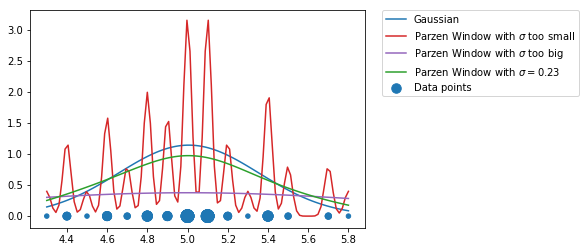

In [17]:
#choose the class 1, and feature 1
feature_1d = iris[iris[:,-1]==1,0]

%pylab inline
#pylab.hist(feature_1d)

feature_1d_y = zeros(len(feature_1d))
count = Counter(feature_1d)
feature_1d_size = [count[x]*20 for x in feature_1d]
# (a) the data points of the subset (displayed on the x axis).
pylab.scatter(feature_1d,feature_1d_y, s = feature_1d_size, label="Data points")


range_x = np.linspace(min(feature_1d),max(feature_1d),100)
dg=DiagonalGaussian_Est.train(feature_1d)
density_est = [dg.predict(x) for x in range_x]
# (b) a plot of the density estimated by your parametric Gaussian estimator.
pylab.plot(range_x,density_est, label="Gaussian")

density_est_parzen_small=Parzen_Est.train(feature_1d,0.02)
density_est_parzen_small = [density_est_parzen_small.predict(x) for x in range_x]
# (c) a plot of the density estimated by the Parzen estimator with a hyper-parameter 
# σ (standard deviation) too small.
pylab.plot(range_x,density_est_parzen_small,c="tab:red",label="Parzen Window with $\sigma$ too small")

dg_parzen_big=Parzen_Est.train(feature_1d,1)
density_est_parzen_big = [dg_parzen_big.predict(x) for x in range_x]
# (d) a plot of the density estimated by the Parzen estimator with the hyper-parameter 
# σ being a little too big.
pylab.plot(range_x,density_est_parzen_big,c="tab:purple",label="Parzen Window with $\sigma$ too big")


dg_parzen_big=Parzen_Est.train(feature_1d,0.23)
density_est_parzen_big = [dg_parzen_big.predict(x) for x in range_x]
# (e) a plot of the density estimated by the Parzen estimator with the 
# hyper-parameter σ that you consider more appropriate. Use a diﬀerent color for each plot, and provide your graph with a clear legend.
pylab.plot(range_x,density_est_parzen_big,c="tab:green",label="Parzen Window with $\sigma=0.23$ ")

pylab.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

pylab.show()

(e) a plot of the density estimated by the Parzen estimator with the hyper-parameter σ that you consider more appropriate. Use a diﬀerent color for each plot, and provide your graph with a clear legend.

(f) Explain how you chose your hyper-parameter σ.

$\sigma = 0.23$

0.2351151151151151


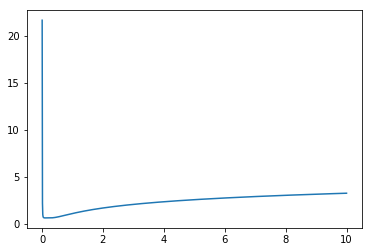

In [6]:
import sys
erm_cur = 0
erm_list = {}
erm_best = sys.maxsize
sigma_best = 0
for sigma in np.linspace(0.005,10,1000):
    dg_parzen=Parzen_Est.train(feature_1d,sigma)
    density_est_parzen = np.array([dg_parzen.predict(x) for x in range_x])
    # Add the min float to Avoid log(0)
    erm_cur = np.mean(-np.log(density_est_parzen+sys.float_info.min))
    erm_list[sigma] = erm_cur
    if erm_cur < erm_best:
        erm_best= erm_cur
        sigma_best= sigma
        
print(sigma_best)
pylab.plot(erm_list.keys(),erm_list.values())

#### 4. 2D densities: Now add a second characteristic feature of Iris, in order to have entries in d = 2 and produce 4 plots, each displaying the points of the subset of the data (with the plot function ), and the contour lines of the density estimated (using the contour function):

In [6]:
#choose the class 1, and feature 1,2
feature_2d = iris[iris[:,-1]==1,0:2]

count = Counter([(xy[0],xy[1]) for xy in feature_2d.tolist()])
feature_2d_size = (20*np.array(list(count.values())))
feature_2d_size = feature_2d_size.tolist()

def plot_origin_point():
    pylab.scatter(feature_2d[:,0],feature_2d[:,1],s=feature_2d_size)

(a) by the diagonal Gaussian parametric estimator.

mu= [5.006 3.428]
sigma^2= [0.121764 0.140816]


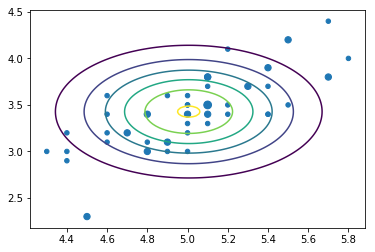

In [41]:

dg=DiagonalGaussian_Est.train(feature_2d)


range_x = np.linspace(np.min(feature_2d,axis=0)[0],np.max(feature_2d,axis=0)[0],100)
range_y = np.linspace(np.min(feature_2d,axis=0)[1],np.max(feature_2d,axis=0)[1],100)

range_xy=[]
for i in range(0,100):
    range_xy += [[]]
    for j in range(0,100):
        range_xy[i]  += [[range_x[j],range_y[i]]]

density_est = np.empty((100,100))
for i in range(0,100): 
    for j in range(0,100):
        density_est[i][j] = dg.predict(range_xy[i][j])

#pylab.axes().set_aspect('equal', 'datalim')
# (a) by the diagonal Gaussian parametric estimator.
plot_origin_point()
pylab.contour(range_x,range_y,density_est)

(b) by the Parzen estimator with the hyper-parameter σ (standard deviation ) being too small.

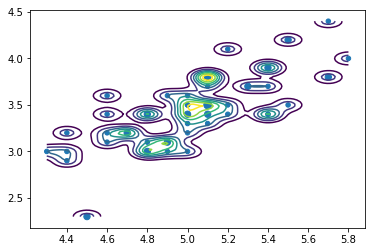

In [9]:
dg=Parzen_Est.train(feature_2d,0.05)


range_x = np.linspace(np.min(feature_2d,axis=0)[0],np.max(feature_2d,axis=0)[0],100)
range_y = np.linspace(np.min(feature_2d,axis=0)[1],np.max(feature_2d,axis=0)[1],100)

range_xy=[]
for i in range(0,100):
    range_xy += [[]]
    for j in range(0,100):
        # x is in the row of range_xy
        range_xy[i]  += [[range_x[j],range_y[i]]]

density_est = np.empty((100,100))
import pdb
for j in range(0,100): 
    for i in range(0,100):
        density_est[i][j] = dg.predict(range_xy[i][j])


#pylab.axes().set_aspect('equal', 'datalim')
plot_origin_point()
pylab.contour(range_x,range_y,density_est)

(c) by the Parzen estimator with the hyper-parameter σ being a little too big.

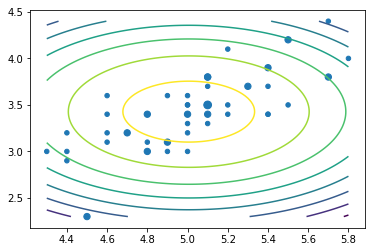

In [42]:
dg=Parzen_Est.train(feature_2d,100)


range_x = np.linspace(np.min(feature_2d,axis=0)[0],np.max(feature_2d,axis=0)[0],100)
range_y = np.linspace(np.min(feature_2d,axis=0)[1],np.max(feature_2d,axis=0)[1],100)

range_xy=[]
for i in range(0,100):
    range_xy += [[]]
    for j in range(0,100):
        range_xy[i]  += [[range_x[j],range_y[i]]]

density_est = np.empty((100,100))
for i in range(0,100): 
    for j in range(0,100):
        density_est[i][j] = dg.predict(range_xy[i][j])

#pylab.axes().set_aspect('equal', 'datalim')
plot_origin_point()
pylab.contour(range_x,range_y,density_est)

(d) by the Parzen estimator with the hyper-parameter σ that you consider more appropriate.

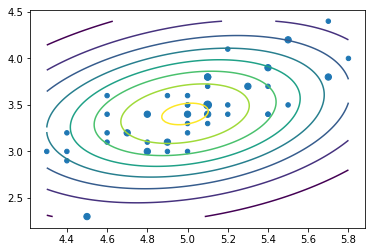

In [43]:
dg=Parzen_Est.train(feature_2d,0.46)


range_x = np.linspace(np.min(feature_2d,axis=0)[0],np.max(feature_2d,axis=0)[0],100)
range_y = np.linspace(np.min(feature_2d,axis=0)[1],np.max(feature_2d,axis=0)[1],100)

range_xy=[]
for i in range(0,100):
    range_xy += [[]]
    for j in range(0,100):
        range_xy[i]  += [[range_x[j],range_y[i]]]

density_est = np.empty((100,100))
for i in range(0,100): 
    for j in range(0,100):
        density_est[i][j] = dg.predict(range_xy[i][j])

#pylab.axes().set_aspect('equal', 'datalim')
plot_origin_point()
pylab.contour(range_x,range_y,density_est)

(e) Explain how you chose your hyper-parameter σ

0.5095959595959596


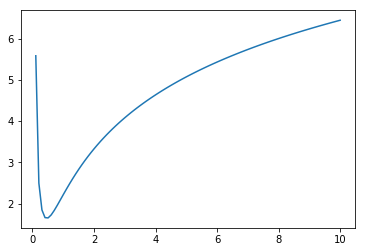

In [12]:
import sys
erm_cur = 0
erm_list = {}
erm_best = sys.maxsize
sigma_best = 0
for sigma in np.linspace(0.11,10,100):
    dg=Parzen_Est.train(feature_2d,sigma)


    range_x = np.linspace(np.min(feature_2d,axis=0)[0],np.max(feature_2d,axis=0)[0],100)
    range_y = np.linspace(np.min(feature_2d,axis=0)[1],np.max(feature_2d,axis=0)[1],100)

    range_xy=[]
    for i in range(0,100):
        range_xy += [[]]
        for j in range(0,100):
            range_xy[i]  += [[range_x[i],range_y[j]]]

    density_est = np.empty((100,100))
    for i in range(0,100): 
        for j in range(0,100):
            density_est[i][j] = dg.predict(range_xy[i][j])

    # Add the min float to Avoid log(0)
    erm_cur = np.mean(-np.log(density_est+sys.float_info.min),axis=(0, 1))
    erm_list[sigma] = erm_cur
    if erm_cur < erm_best:
        erm_best= erm_cur
        sigma_best= sigma
        
print(sigma_best)
pylab.plot(erm_list.keys(),erm_list.values())

0.4636363636363637


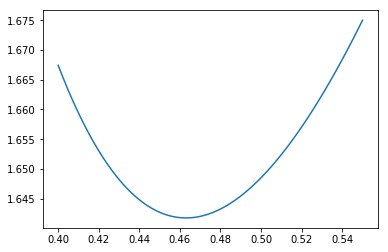

In [13]:
import sys
erm_cur = 0
erm_list = {}
erm_best = sys.maxsize
sigma_best = 0
for sigma in np.linspace(0.4,0.55,100):
    dg=Parzen_Est.train(feature_2d,sigma)


    range_x = np.linspace(np.min(feature_2d,axis=0)[0],np.max(feature_2d,axis=0)[0],100)
    range_y = np.linspace(np.min(feature_2d,axis=0)[1],np.max(feature_2d,axis=0)[1],100)

    range_xy=[]
    for i in range(0,100):
        range_xy += [[]]
        for j in range(0,100):
            range_xy[i]  += [[range_x[i],range_y[j]]]

    density_est = np.empty((100,100))
    for i in range(0,100): 
        for j in range(0,100):
            density_est[i][j] = dg.predict(range_xy[i][j])

    # Add the min float to Avoid log(0)
    erm_cur = np.mean(-np.log(density_est+sys.float_info.min),axis=(0, 1))
    erm_list[sigma] = erm_cur
    if erm_cur < erm_best:
        erm_best= erm_cur
        sigma_best= sigma
        
print(sigma_best)
pylab.plot(erm_list.keys(),erm_list.values())

$\sigma = 0.46$

In [38]:
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np


range_x = np.linspace(np.min(feature_2d,axis=0)[0],np.max(feature_2d,axis=0)[0],100)
range_y = np.linspace(np.min(feature_2d,axis=0)[1],np.max(feature_2d,axis=0)[1],100)

range_xy=[]
for i in range(0,100):
    range_xy += [[]]
    for j in range(0,100):
        # x is in the row of range_xy
        range_xy[i]  += [[range_x[j],range_y[i]]]

def get_parzen_est(sigma):
    dg=Parzen_Est.train(feature_2d,sigma)
    density_est = np.empty((100,100))
    import pdb
    for j in range(0,100): 
        for i in range(0,100):
            density_est[i][j] = dg.predict(range_xy[i][j])
    return density_est

sigma_list = np.arange(0.01,1,0.05)

# Create traces for all the slides
data = [go.Contour(
        z=get_parzen_est(sigma),
        x= range_x,
        y= range_y,
        contours=dict(
            coloring='heatmap',
            showlabels = True,
            labelfont = dict(
                family = 'Raleway',
                size = 12,
                color = 'white',
            )
        ),
        visible = False,
    ) for sigma in sigma_list]

steps = []
for i in range(len(data)):
    step = dict(
        method = 'restyle',  
        args = ['visible', [False] * len(data)],
        label = "{:.2f}".format(sigma_list[i])
    )
    step['args'][1][i] = True # Toggle i'th trace to "visible"
    steps.append(step)
    
data += [ go.Scatter(x=feature_2d[:,0], y=feature_2d[:,1],mode="markers",visible = True ) ]

sliders = [dict(
    active = 1,
    currentvalue = {"prefix": "Sigma= "},
    pad = {"t": 50},
    steps = steps
)]

layout = dict(sliders=sliders)

fig = dict(data=data, layout=layout)

py.iplot(fig, filename='Contour Slider')